In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# own code library
from plotting import *

#### Import and display raw datasets (US -> DJIA /Dow30 components, Japan -> TOPIX core 30 components)

In [55]:
datafolder = os.path.join("../", "data")
df_jp = pd.read_csv(os.path.join(datafolder, "raw", "JP_stocks_WDB.csv"), index_col=0)

# Japan dataset

In [30]:
comps_jp = df_jp.conm.unique()
print("japan companies (name) : \n", list(sorted(comps_jp)))
df_jp.head()

japan companies (name) : 
 ['ASTELLAS PHARMA INC', 'CENTRAL JAPAN RAILWAY CORP', 'DAIICHI SANKYO COMPANY LTD', 'DAIKIN INDUSTRIES LTD', 'FANUC CORP', 'HITACHI LTD', 'HONDA MOTOR CO LTD', 'HOYA CORP', 'ITOCHU CORP', 'KAO CORP', 'KDDI CORP', 'KEYENCE CORP', 'MITSUBISHI CORP', 'MITSUBISHI UFJ FINANCIAL GRP', 'MITSUI & CO LTD', 'MIZUHO FINANCIAL GROUP INC', 'MURATA MANUFACTURING CO LTD', 'NIDEC CORP', 'NINTENDO CO LTD', 'NIPPON TELEGRAPH & TELEPHONE', 'RECRUIT HOLDINGS CO LTD', 'SEVEN & I HOLDINGS CO LTD', 'SHIN-ETSU CHEMICAL CO LTD', 'SOFTBANK GROUP CORP', 'SONY GROUP CORPORATION', 'SUMITOMO MITSUI FINANCIAL GR', 'TAKEDA PHARMACEUTICAL CO LTD', 'TOKIO MARINE HOLDINGS INC', 'TOYOTA MOTOR CORP']


,iid,datadate,conm,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcstd,divd,anncdate,trfd,isin,sedol
gvkey,,,,,,,,,,,,,,,
100668,01W,19950104,ASTELLAS PHARMA INC,5.0,3.233047e+08,136000.0,2070.0,2070.0,2060.0,10.0,NaN,NaN,1.037670,JP3942400007,6985383
100336,01W,19950104,DAIICHI SANKYO COMPANY LTD,3.3,4.051930e+08,77000.0,2480.0,2480.0,2470.0,10.0,NaN,NaN,1.040363,JP3475350009,B0J7D91
101138,01W,19950104,DAIKIN INDUSTRIES LTD,1.0,2.638140e+08,46000.0,884.0,885.0,881.0,10.0,NaN,NaN,1.083172,JP3481800005,6250724
100048,01W,19950104,FANUC CORP,1.0,2.393276e+08,56400.0,4680.0,4690.0,4650.0,10.0,NaN,NaN,1.032267,JP3802400006,6356934
5650,01W,19950104,HITACHI LTD,0.2,3.287147e+09,1674000.0,997.0,997.0,989.0,10.0,NaN,NaN,1.089999,JP3788600009,6429104


In [32]:
# calculate log prices (day end)
df_jp["log_prccd"] = np.log(df_jp["prccd"]) # "prccd" is closing price day end

# add official tickers
# (NOTE: we don't have any tickers in the original dataset, so we fill this gpap by mapping to the company name "conm")
jp_tickers = ["ALPMY","CJPRY","DSNKY","DKILY","FANUY","HTHIY","HMC","HOCPF","ITOCY","KAOCF","KDDIY",
              "KYCCF","MBC","MUFG","MITSY","MFG","MRAAY","NJDCY","NTDOY","NTTYY","RCRRF","SVNDY","SHECY",
              "SFTBY","SONY","SMFG","TAK","TKOMY","TM"]

df_jp["tic"] = df_jp["conm"]
for tic, name in zip(jp_tickers, comps_jp):
    #print(f"{tic}, {name}")
    df_jp.loc[df_jp["conm"] == name, "tic"] = tic
df_jp.head(2)

,iid,datadate,conm,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcstd,divd,anncdate,trfd,isin,sedol,log_prccd,tic
gvkey,,,,,,,,,,,,,,,,,
100668,01W,19950104,ASTELLAS PHARMA INC,5.0,323304657.0,136000.0,2070.0,2070.0,2060.0,10.0,NaN,NaN,1.037670,JP3942400007,6985383,7.635304,ALPMY
100336,01W,19950104,DAIICHI SANKYO COMPANY LTD,3.3,405193000.0,77000.0,2480.0,2480.0,2470.0,10.0,NaN,NaN,1.040363,JP3475350009,B0J7D91,7.816014,CJPRY


In [33]:
# extract tickers for plotting
jp_tics = df_jp["tic"].unique()
jp_tics.sort()

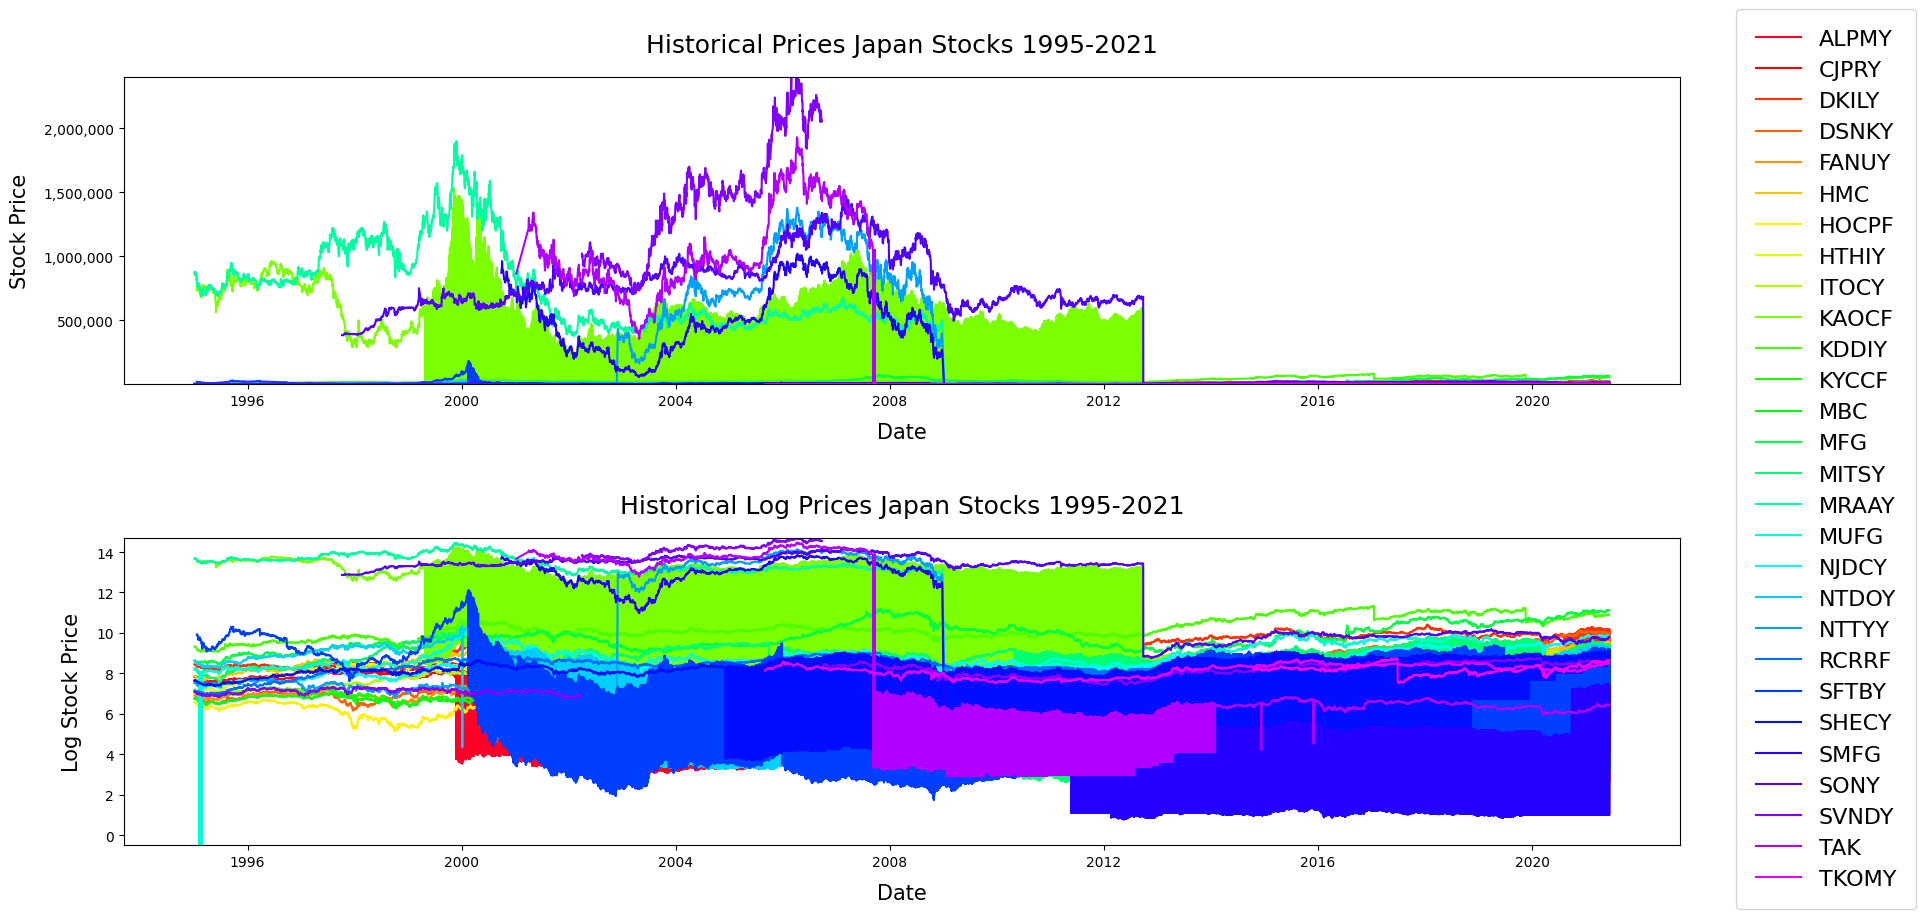

In [34]:
plot_historical_ts(df=df_jp,
                   subplot_rows=2, 
                   subplot_cols=1,
                   datecol="datadate",
                   comp_name_column="tic",
                   comp_names_list=jp_tics, 
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   titles_list=["Historical Prices Japan Stocks 1995-2021", 
                                "Historical Log Prices Japan Stocks 1995-2021"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   ylim_left_list=[df_jp["prccd"][df_jp["tic"].isin(jp_tics)].min(),
                                   df_jp["log_prccd"][df_jp["tic"].isin(jp_tics)].min()], 
                   ylim_right_list=[df_jp["prccd"][df_jp["tic"].isin(jp_tics)].max(),
                                    df_jp["log_prccd"][df_jp["tic"].isin(jp_tics)].max()],
                   figsize=(17,9), 
                   space_between_plots=0.5, 
                   legend_location="right", 
                   legend_location_exact=(0.01, -0.04, 1.12, 1.1), # (right_loc, loc,up_loc, right_loc, up_loc )
                   legend_borderpad=0.9, 
                   legend_borderaxespad=0., 
                   legend_fontsize=16., 
                   label_fontsize=15.,
                   title_fontsize=18., 
                   title_pad=18., 
                   label_pad=10.)

### Analysis of time series starting days for each stock

In [35]:
# lets gett he first and last dates for each of the japanese stocks
first_occurrence_date = {}
for tic in jp_tics:
    firstdate = df_jp.loc[df_jp["tic"] == tic]["datadate"].values[0]
    first_occurrence_date.update({tic: firstdate})
print(first_occurrence_date)

### NOTE: 
# we see that MFG (late 2000), MUFG (2001), RCRRF (2014) and SVNDY (2005) have data only after 2000, 
# so we need to exclude them (maybe keep MFG for now)
# CJPRY (1997) has data after 1995 but before 2000, so we can incude it
# ==> drop MUFG (2001), RCRRF (2014) and SVNDY (2005)
droptics = ["MUFG", "RCRRF", "SVNDY"]

{'ALPMY': 19950104, 'CJPRY': 19950104, 'DKILY': 19950104, 'DSNKY': 19950104, 'FANUY': 19950104, 'HMC': 19950104, 'HOCPF': 19950104, 'HTHIY': 19950104, 'ITOCY': 19950104, 'KAOCF': 19950104, 'KDDIY': 19950104, 'KYCCF': 19950104, 'MBC': 19950104, 'MFG': 19950104, 'MITSY': 19950104, 'MRAAY': 19950104, 'MUFG': 19950104, 'NJDCY': 19950104, 'NTDOY': 19950104, 'NTTYY': 19950104, 'RCRRF': 19950104, 'SFTBY': 19950120, 'SHECY': 19950104, 'SMFG': 20000926, 'SONY': 19971007, 'SVNDY': 19950104, 'TAK': 20010108, 'TKOMY': 20050901, 'TM': 20141017}


In [36]:
len(jp_tics) # must drop 3 of these 29 initial ticks

29

In [37]:
df_jp = df_jp[~df_jp["tic"].isin(droptics)]
print(len(df_jp["tic"].unique())) # 33 tics remaining
df_jp["tic"].unique() # mist be 26 now

26


array(['ALPMY', 'CJPRY', 'DSNKY', 'DKILY', 'FANUY', 'HTHIY', 'HMC',
       'HOCPF', 'ITOCY', 'KAOCF', 'KDDIY', 'KYCCF', 'MBC', 'MITSY', 'MFG',
       'MRAAY', 'NJDCY', 'NTDOY', 'NTTYY', 'SHECY', 'SFTBY', 'SONY',
       'SMFG', 'TAK', 'TKOMY', 'TM'], dtype=object)

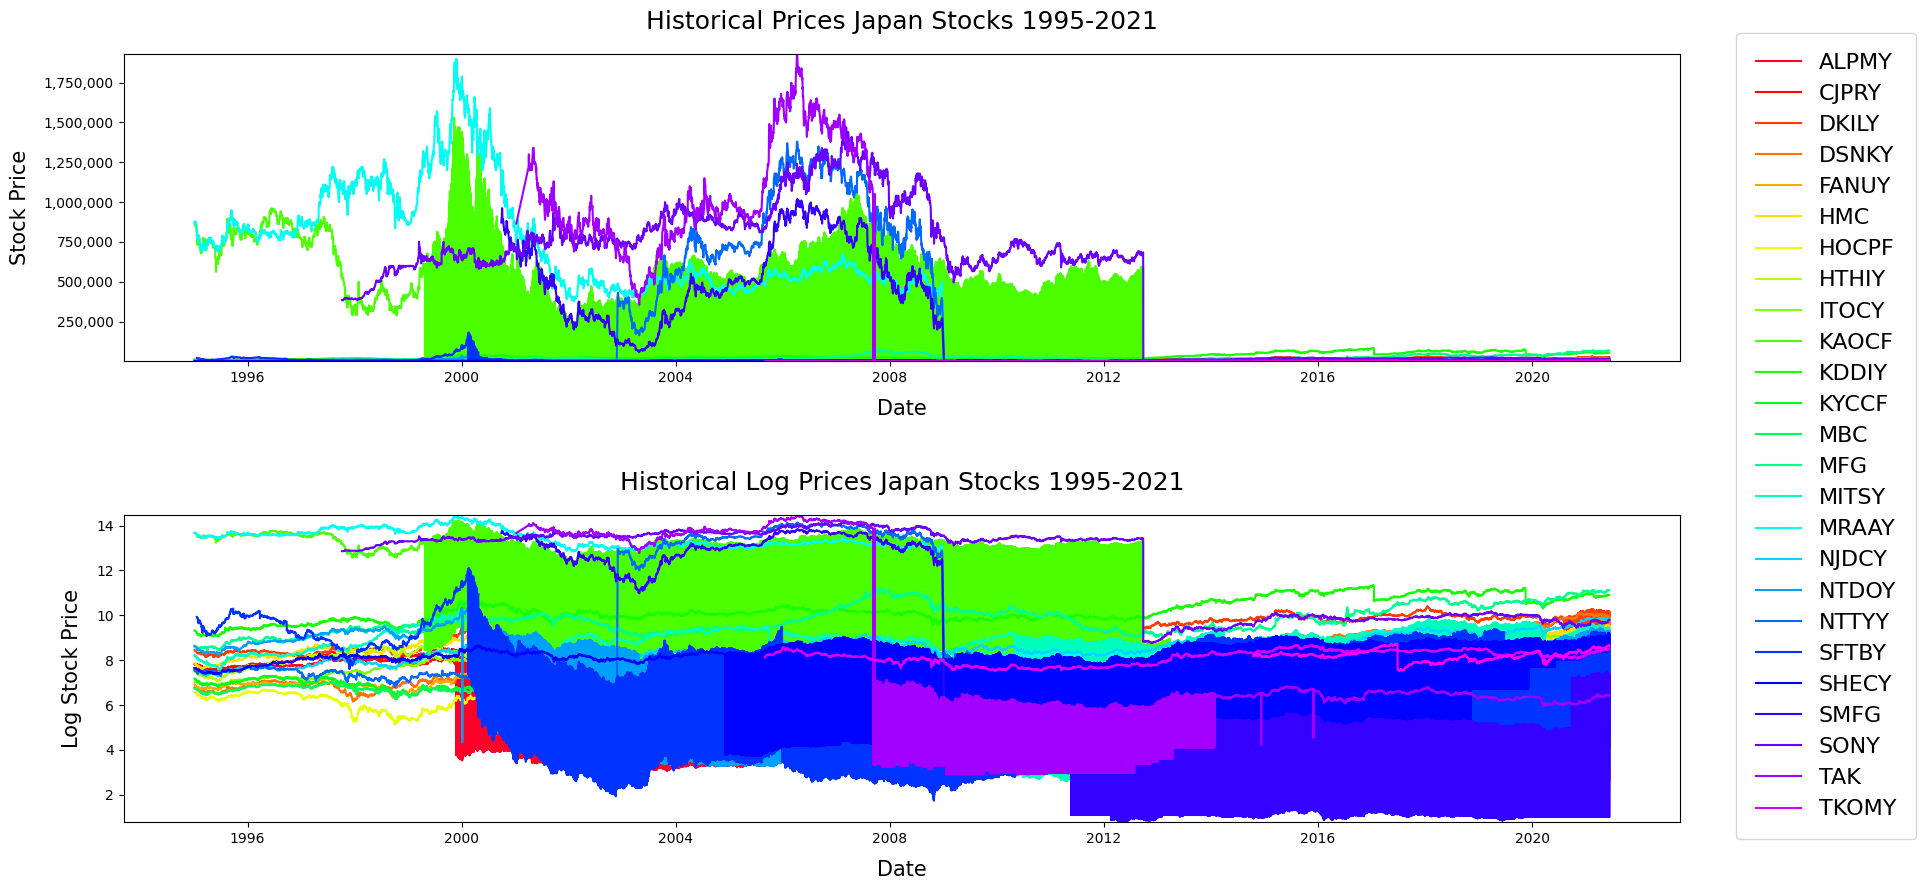

In [38]:
# vizual sanity check for each stock
jp_tics = df_jp["tic"].unique()
jp_tics.sort()
plot_historical_ts(df=df_jp,
                   subplot_rows=2, 
                   subplot_cols=1,
                   datecol="datadate",
                   comp_name_column="tic",
                   comp_names_list=jp_tics, 
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   titles_list=["Historical Prices Japan Stocks 1995-2021", 
                                "Historical Log Prices Japan Stocks 1995-2021"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   ylim_left_list=[df_jp["prccd"][df_jp["tic"].isin(jp_tics)].min(),
                                   df_jp["log_prccd"][df_jp["tic"].isin(jp_tics)].min()], 
                   ylim_right_list=[df_jp["prccd"][df_jp["tic"].isin(jp_tics)].max(),
                                    df_jp["log_prccd"][df_jp["tic"].isin(jp_tics)].max()],
                   figsize=(17,9), 
                   space_between_plots=0.5, 
                   legend_location="right", 
                   legend_location_exact=(0.01, -0.04, 1.12, 1.1), # (right_loc, loc,up_loc, right_loc, up_loc )
                   legend_borderpad=0.9, 
                   legend_borderaxespad=0., 
                   legend_fontsize=16., 
                   label_fontsize=15.,
                   title_fontsize=18., 
                   title_pad=18., 
                   label_pad=10.)

In [39]:
# we see above that some stock still look weird as if they have "damaged" data or 0 stock price at certain times.
# need to check

#check for 0 stock price
for tic in df_jp["tic"].unique():
    subset = df_jp.loc[df_jp["tic"]==tic]
    print(tic)
    print(subset["prccd"].describe())

ALPMY
count    12233.000000
mean      1723.547477
std       1814.206188
min          7.610000
25%         27.130000
50%       1523.000000
75%       3210.000000
max       6598.000000
Name: prccd, dtype: float64
CJPRY
count     6680.000000
mean      2712.200674
std       1385.047323
min       1178.000000
25%       1835.875000
50%       2390.000000
75%       3110.000000
max      10085.000000
Name: prccd, dtype: float64
DSNKY
count     6722.000000
mean      5223.504061
std       5089.423736
min        149.100000
25%       2043.250000
50%       2915.000000
75%       7319.750000
max      24320.000000
Name: prccd, dtype: float64
DKILY
count     6904.000000
mean     11591.071603
std       6956.297055
min        146.500000
25%       5900.000000
50%      10115.000000
75%      17280.000000
max      33450.000000
Name: prccd, dtype: float64
FANUY
count    6679.000000
mean     1083.991915
std      1030.872749
min       231.000000
25%       607.500000
50%       775.000000
75%      1020.000000
max    

In [44]:
last_occurrence_date = {}
for tic in jp_tics:
    lastdate = df_jp.loc[df_jp["tic"] == tic]["datadate"].values[-1]
    last_occurrence_date.update({tic: lastdate})
print(last_occurrence_date)
### NOTE: all companies seem to have time series data available up to the latest possible date, which is good

{'ALPMY': 20210611, 'CJPRY': 20210611, 'DKILY': 20210611, 'DSNKY': 20210611, 'FANUY': 20210611, 'HMC': 20210611, 'HOCPF': 20210611, 'HTHIY': 20210611, 'ITOCY': 20210611, 'KAOCF': 20210611, 'KDDIY': 20210611, 'KYCCF': 20210611, 'MBC': 20210611, 'MFG': 20210611, 'MITSY': 20210611, 'MRAAY': 20210611, 'NJDCY': 20210611, 'NTDOY': 20210611, 'NTTYY': 20210611, 'SFTBY': 20210611, 'SHECY': 20210611, 'SMFG': 20210611, 'SONY': 20210611, 'TAK': 20210611, 'TKOMY': 20210611, 'TM': 20210611}


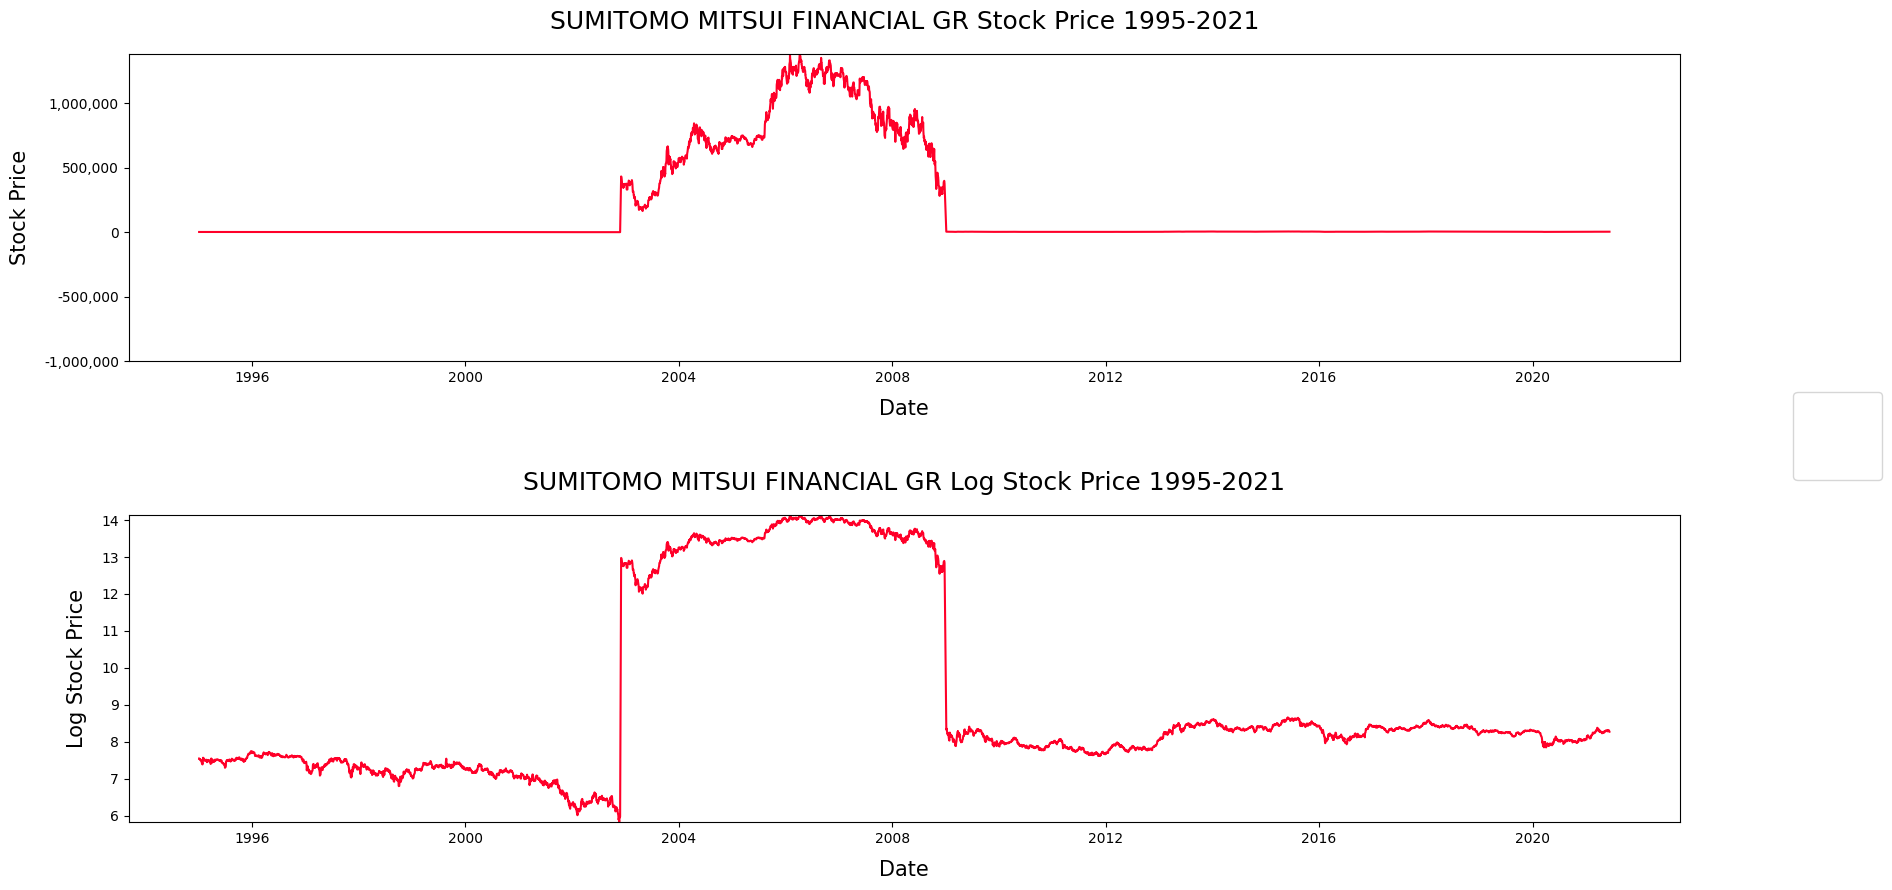

In [46]:
plot_historical_ts(df=df_jp,
                   subplot_rows=2, 
                   subplot_cols=1,
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   datecol="datadate",
                   titles_list=["SUMITOMO MITSUI FINANCIAL GR Stock Price 1995-2021", 
                                "SUMITOMO MITSUI FINANCIAL GR Log Stock Price 1995-2021"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   comp_names_list=["SUMITOMO MITSUI FINANCIAL GR"], 
                   #daterange_str="1995-2021", 
                   comp_name_column="conm", figsize=(17,9), 
                   legend_location="right", legend_location_exact=(0.01,-0.04,1.1, 1.1),
                   legend_borderpad=2., legend_borderaxespad=0., 
                   legend_fontsize=16., label_fontsize=15.,
                   title_fontsize=18., title_pad=18., space_between_plots=0.5, 
                   label_pad=10., 
                   ylim_left_list=[-1000000,
                                   df_jp["log_prccd"][df_jp["conm"].isin(["SUMITOMO MITSUI FINANCIAL GR"])].min()], 
                   ylim_right_list=[df_jp["prccd"][df_jp["conm"].isin(["SUMITOMO MITSUI FINANCIAL GR"])].max(),
                                    df_jp["log_prccd"][df_jp["conm"].isin(["SUMITOMO MITSUI FINANCIAL GR"])].max()])

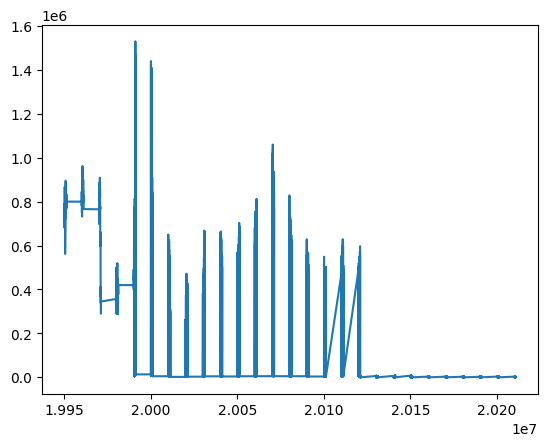

In [47]:
plt.plot(df_jp[(df_jp.conm=="KDDI CORP")]["datadate"], 
         df_jp[(df_jp.conm=="KDDI CORP")]["prccd"])

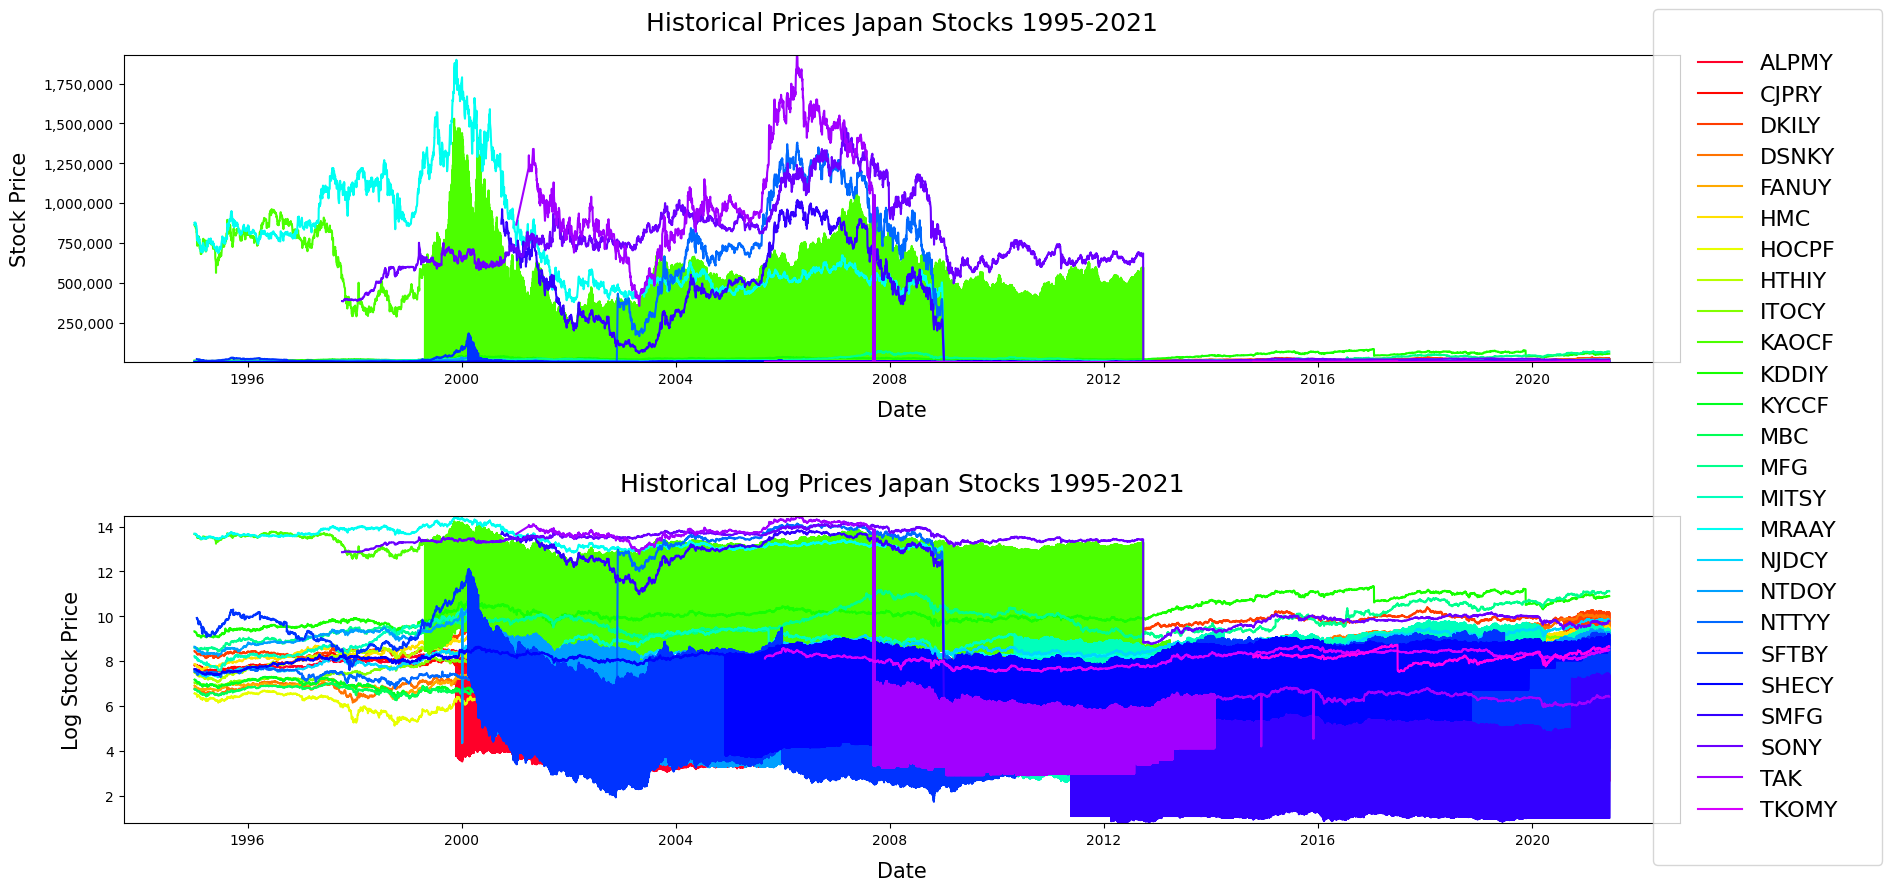

In [49]:
# vizual sanity check for each stock
jp_tics = df_jp["tic"].unique()
jp_tics.sort()
plot_historical_ts(df=df_jp,
                   subplot_rows=2, subplot_cols=1,
                   x_cols_list=["datadate"]*2,
                   y_cols_list=["prccd", "log_prccd"],
                   datecol="datadate",
                   titles_list=["Historical Prices Japan Stocks 1995-2021", 
                                "Historical Log Prices Japan Stocks 1995-2021"],
                   x_labels_list=["Date", "Date"],
                   y_labels_list=["Stock Price", "Log Stock Price"],
                   comp_names_list=jp_tics, 
                   #daterange_str="1995-2021", 
                   comp_name_column="tic", figsize=(17,9), 
                   legend_location="right", legend_location_exact=(0.01,-0.04,1.1, 1.1),
                   legend_borderpad=2., legend_borderaxespad=0., 
                   legend_fontsize=16., label_fontsize=15.,
                   title_fontsize=18., title_pad=18., space_between_plots=0.5, 
                   label_pad=10., 
                   ylim_left_list=[df_jp["prccd"][df_jp["tic"].isin(jp_tics)].min(),
                                   df_jp["log_prccd"][df_jp["tic"].isin(jp_tics)].min()], 
                   ylim_right_list=[df_jp["prccd"][df_jp["tic"].isin(jp_tics)].max(),
                                    df_jp["log_prccd"][df_jp["tic"].isin(jp_tics)].max()])

In [50]:
# we see above that some stock still look weird as if they have "damaged" data or 0 stock price at certain times.
# need to check

#check for 0 stock price
for tic in df_jp["tic"].unique():
    subset = df_jp.loc[df_jp["tic"]==tic]
    print(tic)
    print(subset["prccd"].describe())

ALPMY
count    12233.000000
mean      1723.547477
std       1814.206188
min          7.610000
25%         27.130000
50%       1523.000000
75%       3210.000000
max       6598.000000
Name: prccd, dtype: float64
CJPRY
count     6680.000000
mean      2712.200674
std       1385.047323
min       1178.000000
25%       1835.875000
50%       2390.000000
75%       3110.000000
max      10085.000000
Name: prccd, dtype: float64
DSNKY
count     6722.000000
mean      5223.504061
std       5089.423736
min        149.100000
25%       2043.250000
50%       2915.000000
75%       7319.750000
max      24320.000000
Name: prccd, dtype: float64
DKILY
count     6904.000000
mean     11591.071603
std       6956.297055
min        146.500000
25%       5900.000000
50%      10115.000000
75%      17280.000000
max      33450.000000
Name: prccd, dtype: float64
FANUY
count    6679.000000
mean     1083.991915
std      1030.872749
min       231.000000
25%       607.500000
50%       775.000000
75%      1020.000000
max    